<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

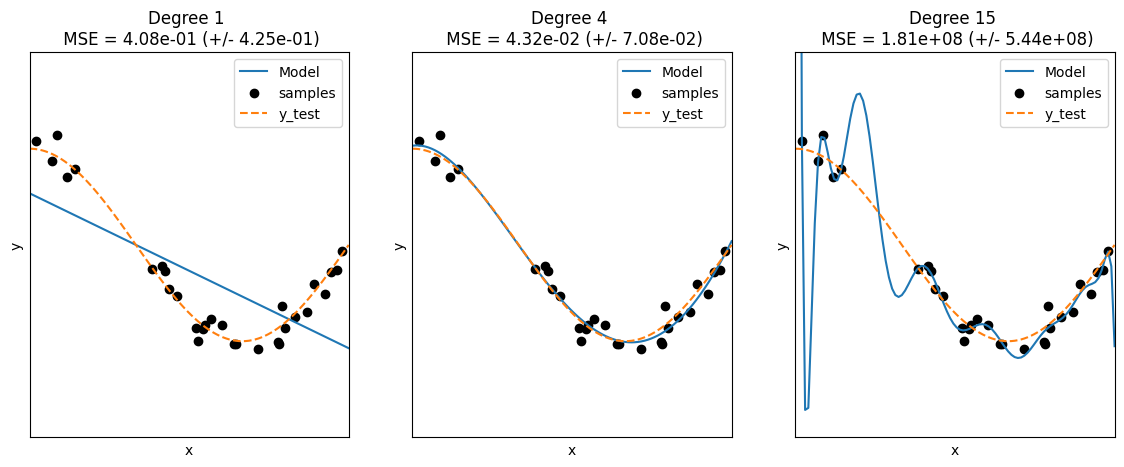

In [ ]:
plt.figure(figsize = (14, 5))
j=0
for i in result:
    pipelines = result[i][0]
    mean_score = result[i][1]
    std_score = result[i][2]
    pred = pipelines.predict(X_test[:, np.newaxis])
    j+=1
    ax = plt.subplot(1, len(degrees), j)
    plt.plot(X_test, pred, label='Model')
    plt.scatter(X, y, c='k', label='samples')
    plt.plot(X_test, y_test, '--', label='y_test')
    plt.xlim((0, 1))
    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plt.title(f'Degree {i} \n MSE = {mean_score:.2e} (+/- {std_score:.2e})')
    plt.setp(ax, xticks=(), yticks=())

https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html

https://scott.fortmann-roe.com/docs/BiasVariance.html

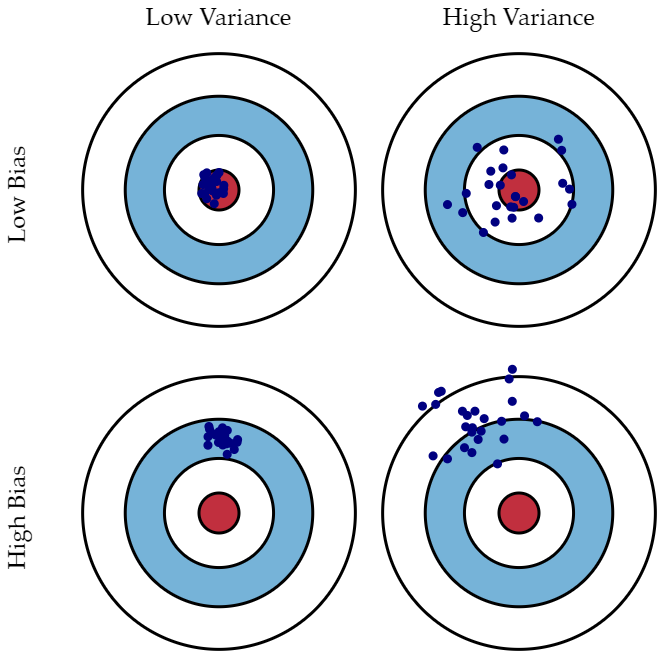

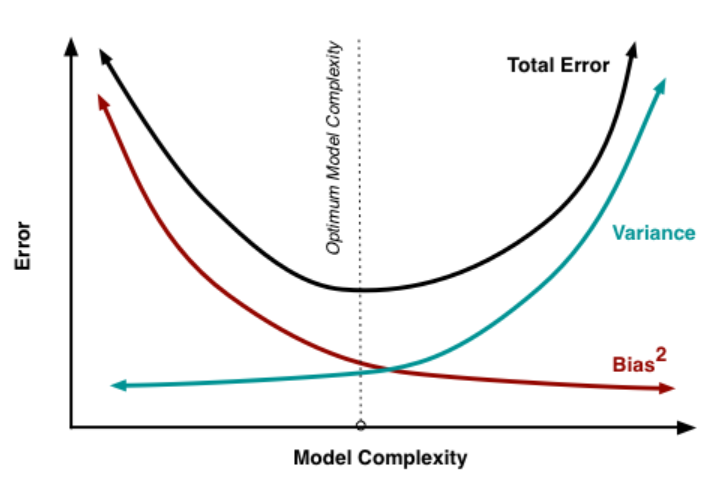

In [ ]:
for i in result:
    w = result[i][0].named_steps['linear_regression'].coef_
    mses = result[i][1]
    print(f' degree={i} 의 MSE : {mses:.2e}')
    print(f' degree={i} 의 회귀 계수 : \n {w}')
    print('=='*50)

 degree=1 의 MSE : 4.08e-01
 degree=1 의 회귀 계수 : 
 [-1.60931179]
 degree=4 의 MSE : 4.32e-02
 degree=4 의 회귀 계수 : 
 [  0.46754142 -17.78954475  23.5926603   -7.26289872]
 degree=15 의 MSE : 1.81e+08
 degree=15 의 회귀 계수 : 
 [-2.98293082e+03  1.03899393e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]


#최적화 = RSS 최소화 + 회귀 계수 제어

$$
RSS = \sum (y_i - \hat y_i)^2
 = \sum (y_i - (w_1 \times x + w_0))^2
$$

위 식을 일반화 하면,

$$ L(w) = {1 \over 2} \sum (y_i - \phi(w))^2$$


$$
L_R(w) = RSS + \alpha || X ||_p
$$

$\alpha$ : 하이퍼파라미터

norm 노름 놈

$$
||X||_p = \left( \sum_{i=1, d} |x_i|^p \right )^{1 \over p}
$$

p=1, X = (3, -4, 1), L1 = 8

p=2, X = (3, -4, 1), L2 = (3 * 3 + |-4 | * |-4| + 1 * 1) **0.5 = 5.099

p=3, X = (3, -4, 1),  L3 = (3 * 3 * 3 + 4 * * 3 + 1) * * (1/3) = 4.514


Euclidean norm
$$ unit \ vector = {x \over ||x||_2}$$

P 값으로 1과 2를 사용하며, 각각 L1 노름, L2  노름이라 부른다.

L1 노름 : $$ L_R(w) = L(w) + \alpha \sum_{j=1}^d |w_j|$$

L2 노름 : $$ L_R(w) = L(w) + \alpha \sum_{j=1}^d w_j^2$$

<기계학습, 오일석, 한빛아카데미, 274~277p>

L1 norm : 라쏘 회귀 : 회귀 계수를 0으로 만들어, 불필요한 회귀계수는 삭제 --> 회귀 계수 선택

L2 norm : 릿지 회귀 : 회귀 계수를 감소시키나 0으로 만들지는 않음

#Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ls ./drive/MyDrive/data/bos*

./drive/MyDrive/data/boston_house.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./drive/MyDrive/data/boston_house.csv')

In [ ]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    int64  
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
y_target = df.PRICE
X_data = df.iloc[:, 1:-1]

In [ ]:
X_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
y_target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
ridge=Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target,
                                 scoring='neg_mean_squared_error', cv=5)
rmses = np.sqrt(-1*neg_mse_scores)
avg_rmses = np.mean(rmses)

In [ ]:
neg_mse_scores

array([-11.4217962 , -24.29446706, -28.14355069, -74.59916618,
       -28.51714218])

In [ ]:
rmses

array([3.3796148 , 4.92894178, 5.30504955, 8.63708088, 5.3401444 ])

In [ ]:
avg_rmses

5.51816628086897

In [ ]:
alphas = [0, 0.1, 1, 10, 50, 100, 200]

In [ ]:
for i in alphas:
    ridge = Ridge(alpha=i)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(i,':', np.round(avg_rmse,4))

0 : 5.8287
0.1 : 5.7885
1 : 5.6526
10 : 5.5182
50 : 5.3731
100 : 5.3296
200 : 5.3405


In [ ]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    print('===== ', alpha, ' =====')
    print(coeff)

=====  0  =====
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64
=====  0.1  =====
CRIM       -0.107474
ZN          0.046572
INDUS       0.015999
CHAS        2.670019
NOX       -16.684645
RM          3.818233
AGE        -0.000269
DIS        -1.459626
RAD         0.303515
TAX        -0.012421
PTRATIO    -0.940759
B           0.009368
LSTAT      -0.525966
dtype: float64
=====  1  =====
CRIM       -0.104595
ZN          0.047443
INDUS      -0.008805
CHAS        2.552393
NOX       -10.777015
RM          3.854000
AGE        -0.005415
DIS        -1.372654
RAD         0.290142
TAX        -0.012912
PTRATIO    -0.876074
B           0.009673
LSTAT      -0.533343
dtype: float64
=====  10  =====
CRIM      -0.101435
ZN         0.049579
INDUS     -0.042962
CHAS     

In [ ]:
def alpha_w_plot(alpha, coeffs, pos, fig, axes):
    plot_title = 'alpha : ' + str(alpha)
    coeff = coeffs.sort_values(ascending=False)
    axes[pos].set_title(plot_title)
    axes[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axes[pos])

In [ ]:
import seaborn as sns

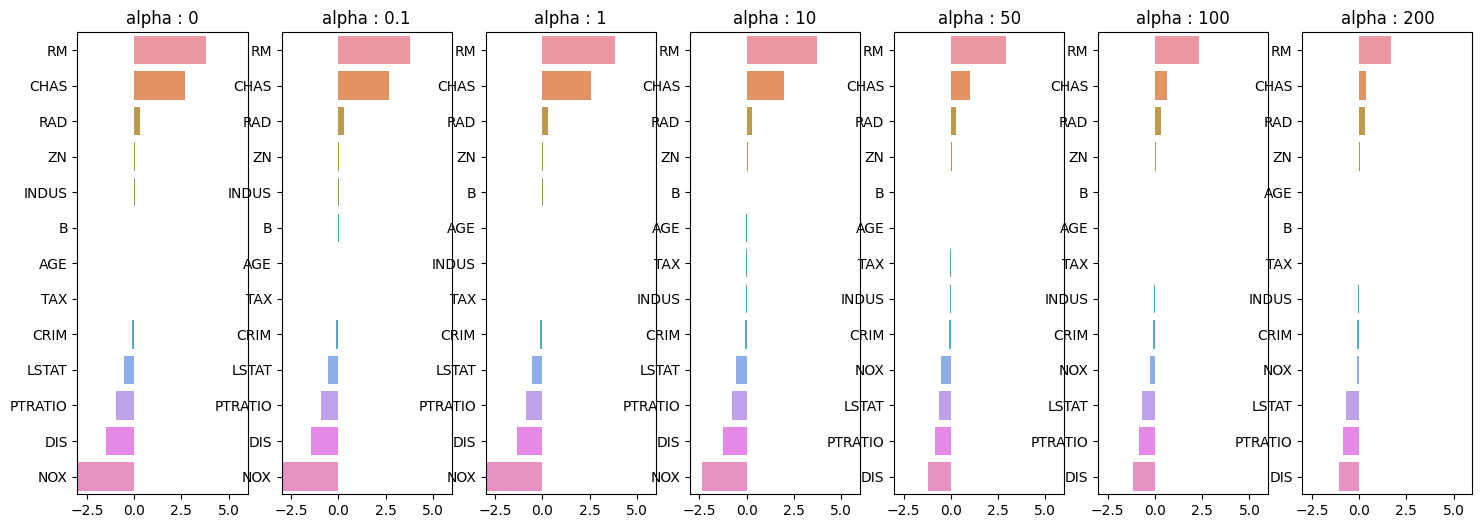

In [ ]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=7)
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    alpha_w_plot(alpha, coeff, pos, fig, axes)

# Elastic Net

### L(w) = RSS + L1 Norm + L2 Norm = RSS + a * L1 + b * L2


a와 b 는 각 노름의 alpha 값에 해당

l1_ratio = a / (a+b)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
def get_linear_reg_eval(model_name, params=None, X_data=None, y_target=None):
    coeff_df = pd.DataFrame()
    for param in params:
        if model_name == 'Ridge' :
            model = Ridge(alpha=param)
        if model_name == 'Lasso' :
            model = Lasso(alpha=param)
        if model_name == 'ElasticNet' :
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        model.fit(X_data, y_target)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
        neg_mse_scores = cross_val_score(model, X_data, y_target,
                                         scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(param, ' : ', avg_rmse)
    return coeff_df

In [ ]:
alphas = [0.07, 0.1, 0.5, 1, 3]

In [ ]:
result = get_linear_reg_eval('Lasso',params=alphas, X_data=X_data, y_target=y_target)

0.07  :  5.612284267526676
0.1  :  5.615116035266935
0.5  :  5.6691234095948975
1  :  5.776020813823375
3  :  6.188763210800905


In [ ]:
result.sort_values(by=result.columns[0], ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [ ]:
result = get_linear_reg_eval('ElasticNet',params=alphas, X_data=X_data, y_target=y_target)

0.07  :  5.541654347348139
0.1  :  5.52592849629491
0.5  :  5.466748649445586
1  :  5.596874445109748
3  :  6.068121638621163


In [ ]:
result.sort_values(by=result.columns[0], ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


#데이터 변환 방법

1. 표준화 , 정규화 : 효과가 적을 수 있다.

2. PolynomialFeatures (다항 특성 적용) : 회귀계수가 많아져서 과적합

3. 로그변환

    np.log1p 사용해서 데이터변환 => 정규성을 높여 준다.

    값을 복원 할때는 np.expm1 사용

In [ ]:
y=np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

In [ ]:
y

array([0.1 , 0.05, 0.1 , 0.  , 0.05, 0.1 , 0.  , 0.6 , 0.  , 0.  ])

In [ ]:
np.log1p(y)

array([0.09531018, 0.04879016, 0.09531018, 0.        , 0.04879016,
       0.09531018, 0.        , 0.47000363, 0.        , 0.        ])

In [ ]:
np.log(1+y)

array([0.09531018, 0.04879016, 0.09531018, 0.        , 0.04879016,
       0.09531018, 0.        , 0.47000363, 0.        , 0.        ])

In [ ]:
np.log(y)

<ipython-input-39-d0070684806c>:1: RuntimeWarning: divide by zero encountered in log
  np.log(y)


array([-2.30258509, -2.99573227, -2.30258509,        -inf, -2.99573227,
       -2.30258509,        -inf, -0.51082562,        -inf,        -inf])

In [ ]:
k_1 = np.log1p(y)

In [ ]:
np.expm1(k_1)

array([0.1 , 0.05, 0.1 , 0.  , 0.05, 0.1 , 0.  , 0.6 , 0.  , 0.  ])

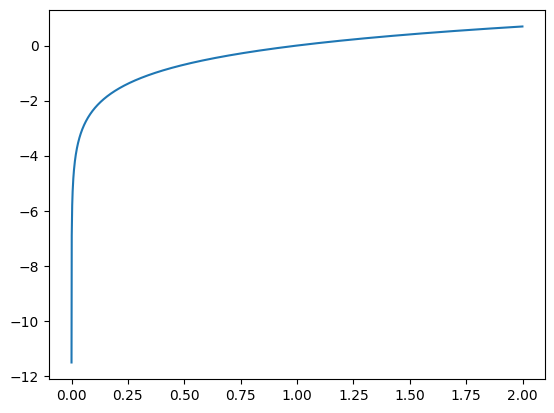

In [ ]:
X = np.arange(0.00001, 2, 0.001)
plt.plot(X, np.log(X))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

In [ ]:
def get_scaled_data(method=None, p_degree=None, input_data=None):
    if method=='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data=input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [ ]:
alphas = [0.1, 1, 10, 100]
scale_methods = [(None, None), ('Standard', None), ('Standard', 2),('MinMax', None),
                 ('MinMax', 2), ('Log', None)]

In [ ]:
def get_param_avg_rmse(model_name, params=None, X_data=None, y_target=None):
    param_avg_rmse_dict = {}
    for param in params:
        if model_name == 'Ridge' :
            model = Ridge(alpha=param)
        if model_name == 'Lasso' :
            model = Lasso(alpha=param)
        if model_name == 'ElasticNet' :
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data, y_target,
                                         scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        param_avg_rmse_dict[param]=avg_rmse
    return param_avg_rmse_dict

In [ ]:
result_dict={}
for sm in scale_methods:
    X_data_scaled = get_scaled_data(method=sm[0], p_degree=sm[1], input_data=X_data)
    result = get_param_avg_rmse('Ridge', params=alphas, X_data=X_data_scaled, y_target=y_target)
    result_dict[str(sm)]=result

In [ ]:
result_dict

{'(None, None)': {0.1: 5.788486627032413,
  1: 5.6525709656135446,
  10: 5.51816628086897,
  100: 5.329589628472142},
 "('Standard', None)": {0.1: 5.825992799389438,
  1: 5.802889517257733,
  10: 5.636831222559068,
  100: 5.421374711794966},
 "('Standard', 2)": {0.1: 8.827235873001511,
  1: 6.87128752596235,
  10: 5.484870425533356,
  100: 4.634437778261926},
 "('MinMax', None)": {0.1: 5.763570225288303,
  1: 5.46504508156494,
  10: 5.754163637679423,
  100: 7.634919863623539},
 "('MinMax', 2)": {0.1: 5.297560003127247,
  1: 4.322660371524886,
  10: 5.185204257580534,
  100: 6.5378668897043655},
 "('Log', None)": {0.1: 4.770429614681661,
  1: 4.676227018966876,
  10: 4.836439992635268,
  100: 6.2409162327190355}}

In [ ]:
rmse_df = pd.DataFrame(result_dict)

In [ ]:
rmse_df

,"(None, None)","('Standard', None)","('Standard', 2)","('MinMax', None)","('MinMax', 2)","('Log', None)"
0.1,5.788487,5.825993,8.827236,5.763570,5.297560,4.770430
1.0,5.652571,5.802890,6.871288,5.465045,4.322660,4.676227
10.0,5.518166,5.636831,5.484870,5.754164,5.185204,4.836440
100.0,5.329590,5.421375,4.634438,7.634920,6.537867,6.240916


In [ ]:
result_dict={}
for sm in scale_methods:
    X_data_scaled = get_scaled_data(method=sm[0], p_degree=sm[1], input_data=X_data)
    result = get_param_avg_rmse('Lasso', params=alphas, X_data=X_data_scaled, y_target=y_target)
    result_dict[str(sm)]=result
rmse_df = pd.DataFrame(result_dict)
rmse_df

,"(None, None)","('Standard', None)","('Standard', 2)","('MinMax', None)","('MinMax', 2)","('Log', None)"
0.1,5.615116,5.657689,5.185112,5.905511,5.463129,5.182672
1.0,5.776021,6.078180,4.978940,8.547670,8.694994,5.935711
10.0,6.585732,9.558336,9.557026,9.558336,9.558336,9.558336
100.0,8.393275,9.558336,9.558336,9.558336,9.558336,9.558336


In [ ]:
result_dict={}
for sm in scale_methods:
    X_data_scaled = get_scaled_data(method=sm[0], p_degree=sm[1], input_data=X_data)
    result = get_param_avg_rmse('ElasticNet', params=alphas, X_data=X_data_scaled, y_target=y_target)
    result_dict[str(sm)]=result
rmse_df = pd.DataFrame(result_dict)
rmse_df

,"(None, None)","('Standard', None)","('Standard', 2)","('MinMax', None)","('MinMax', 2)","('Log', None)"
0.1,5.525928,5.580513,4.999184,6.204370,5.696484,5.171928
1.0,5.596874,6.048212,5.154968,9.036145,8.682761,7.065327
10.0,6.508988,9.536148,9.519859,9.558336,9.558336,9.558336
100.0,8.344198,9.558336,9.558336,9.558336,9.558336,9.558336


In [ ]:
ls ./drive/MyDrive/data/C*

./drive/MyDrive/data/California_Houses.csv  ./drive/MyDrive/data/ChatBotData.csv
./drive/MyDrive/data/CCTV_Seoul.csv         ./drive/MyDrive/data/ChatBotData.csv_short


In [ ]:
df = pd.read_csv('./drive/MyDrive/data/California_Houses.csv')

In [ ]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [ ]:
df.isna().sum().sum()

0

In [ ]:
target = df.Median_House_Value

In [ ]:
data = df.iloc[:, 1:]

In [ ]:
data

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [ ]:
target

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: Median_House_Value, Length: 20640, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,
                                                    random_state=156)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 13), (4128, 13), (16512,), (4128,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([ 3.91899566e+04,  9.29075502e+02, -5.14069203e+00,  9.92998202e+01,
       -3.97998221e+01,  4.98160074e+01, -4.53930723e+04, -2.78238275e+04,
       -2.29133119e-01, -1.49534491e-01,  2.51570579e-01,  1.51687540e-01,
       -1.22156738e-01])

In [ ]:
lr.intercept_

-1745518.798813449

In [ ]:
lr.score(X_train, y_train)

0.650997838480804

In [ ]:
lr.score(X_test, y_test)

0.6283968239647766

In [ ]:
def Regression_process(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=156)
    lr = LinearRegression().fit(X_train, y_train)
    print('R2 (train set, test set)', np.round(lr.score(X_train, y_train, 4)),
          np.round(lr.score(X_test, y_test, 4)))

In [ ]:
data

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [ ]:
X=data.drop(['Latitude', 'Longitude'], axis=1)

In [ ]:
X

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,1665,374,845,330,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,2.5568,18,697,150,356,114,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,1.7000,17,2254,485,1007,433,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,1.8672,18,1860,409,741,349,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [ ]:
y = target

In [ ]:
def Regression_process(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=156)
    lr = LinearRegression().fit(X_train, y_train)
    print('R2 (train set, test set)', np.round(lr.score(X_train, y_train), 4),
          np.round(lr.score(X_test, y_test), 4))

In [ ]:
Regression_process(X, y)

R2 (train set, test set) 0.6396 0.6191


In [ ]:
import matplotlib.style as style
style.use('ggplot')
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import norm
from scipy import stats

<ipython-input-95-a64f542dc9ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, fit=norm)


<Axes: xlabel='Median_House_Value', ylabel='Density'>

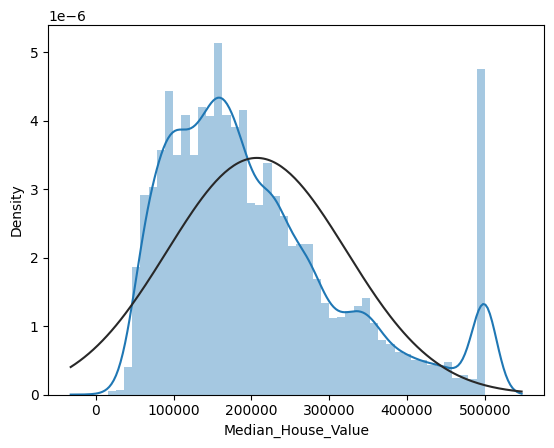

In [ ]:
sns.distplot(y, fit=norm)

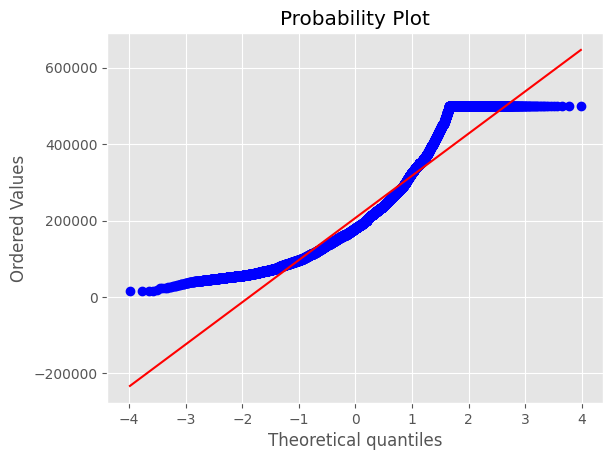

In [ ]:
fig, ax = plt.subplots()
stats.probplot(y, plot=ax)
plt.show()

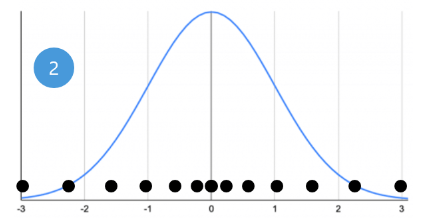

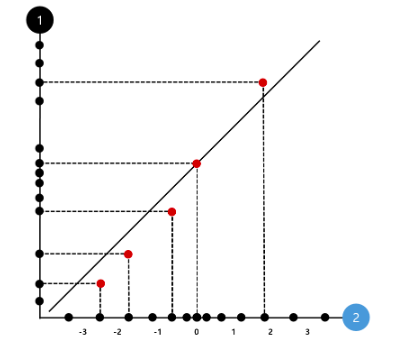

In [ ]:
from scipy import stats

In [ ]:
rv = stats.norm()

In [ ]:
norm_samples = rv.rvs((1000,))

In [ ]:
norm_samples.shape

(1000,)

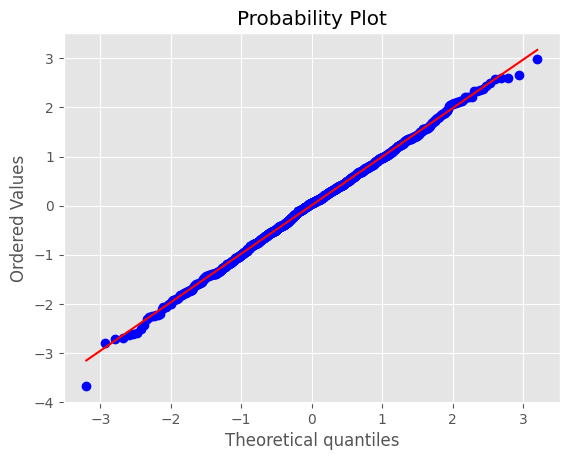

In [ ]:
fig, ax = plt.subplots()
stats.probplot(norm_samples, plot=ax)
plt.show()

<Axes: >

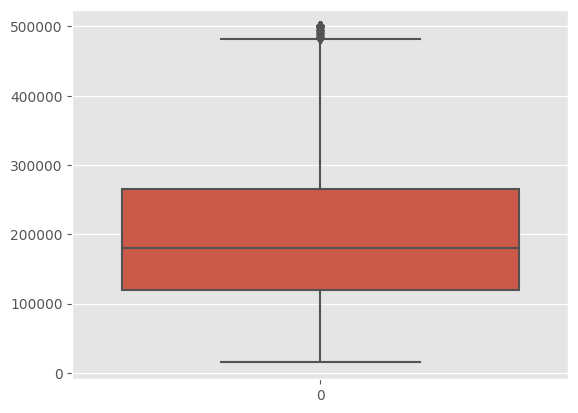

In [ ]:
sns.boxplot(y)

In [ ]:
sns.set_style("whitegrid")

def visualize_target(y):
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    grid = gridspec.GridSpec(ncols=5, nrows=5, figure=fig)

    ax1 = fig.add_subplot(grid[0:2, :4])
    ax1.set_title('Histogram')
    sns.distplot(y, norm_hist=True,fit=norm, ax = ax1,color='indianred')

    ax2 = fig.add_subplot(grid[2:, :4])
    ax2.set_title('QQ_plot')
    stats.probplot(y, plot = ax2)

    ax3 = fig.add_subplot(grid[:, 4])
    ax3.set_title('Box Plot')
    sns.boxplot(y=y, orient='v', ax = ax3,color='indianred')

<ipython-input-106-8f15ccf60ef3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, norm_hist=True,fit=norm, ax = ax1,color='indianred')


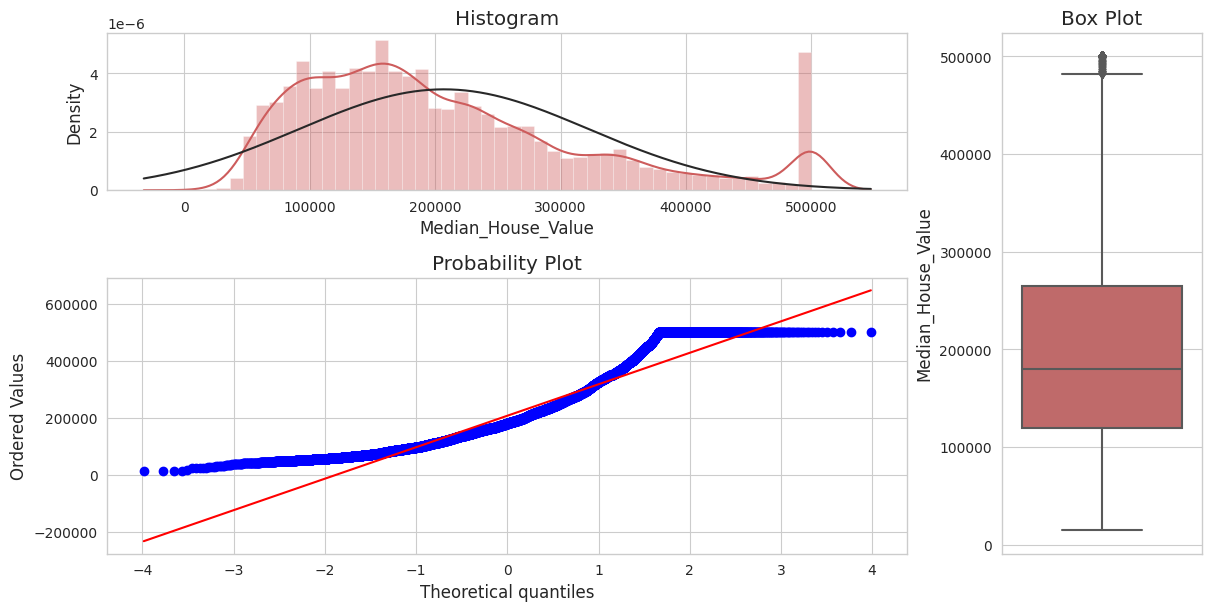

In [ ]:
visualize_target(y)

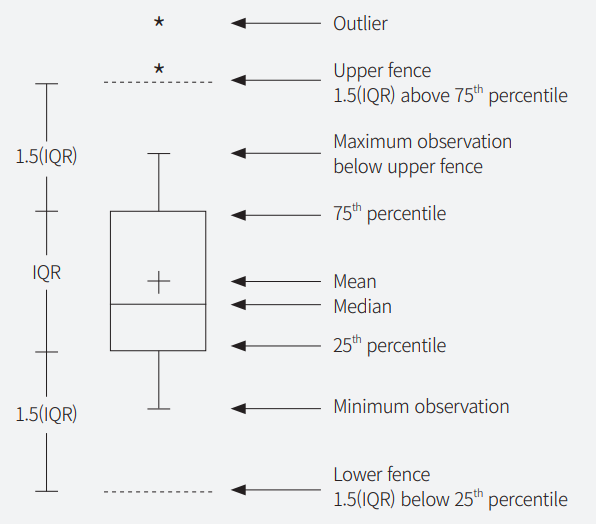

In [ ]:
def rm_outlier(x, y):
    q1 = y.quantile(0.25)
    q3 = y.quantile(0.75)
    iqr = q3-q1
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outlier=[]
    for i in y:
        if i<fence_low or i>fence_high:
            outlier.append(i)
    print('outlier : ', np.round((len(outlier)/y.shape[0])*100, 4), '% removed' )
    x = x[(y>fence_low)&(y<fence_high)]
    y = y[(y>fence_low)&(y<fence_high)]
    return x, y

In [ ]:
X.shape, y.shape

((20640, 11), (20640,))

In [ ]:
X_in, y_in = rm_outlier(X, y)

outlier :  5.189 % removed


In [ ]:
X_in.shape, y_in.shape

((19569, 11), (19569,))

<ipython-input-106-8f15ccf60ef3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, norm_hist=True,fit=norm, ax = ax1,color='indianred')


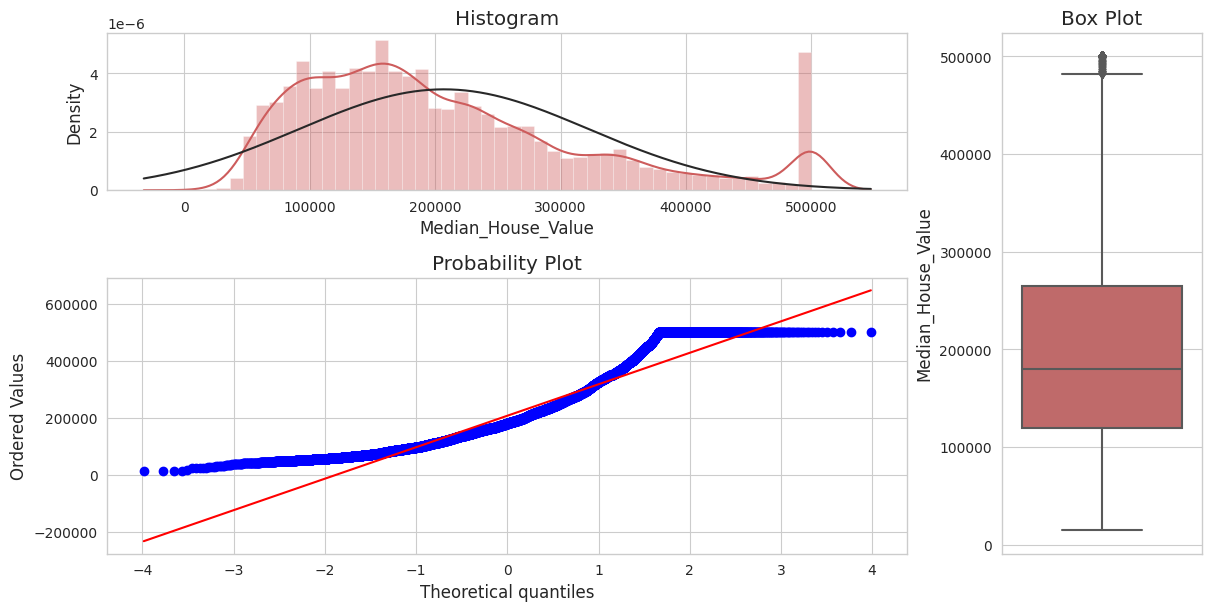

In [ ]:
visualize_target(y)

In [ ]:
X, y = rm_outlier(X, y)

outlier :  5.189 % removed


<ipython-input-106-8f15ccf60ef3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, norm_hist=True,fit=norm, ax = ax1,color='indianred')


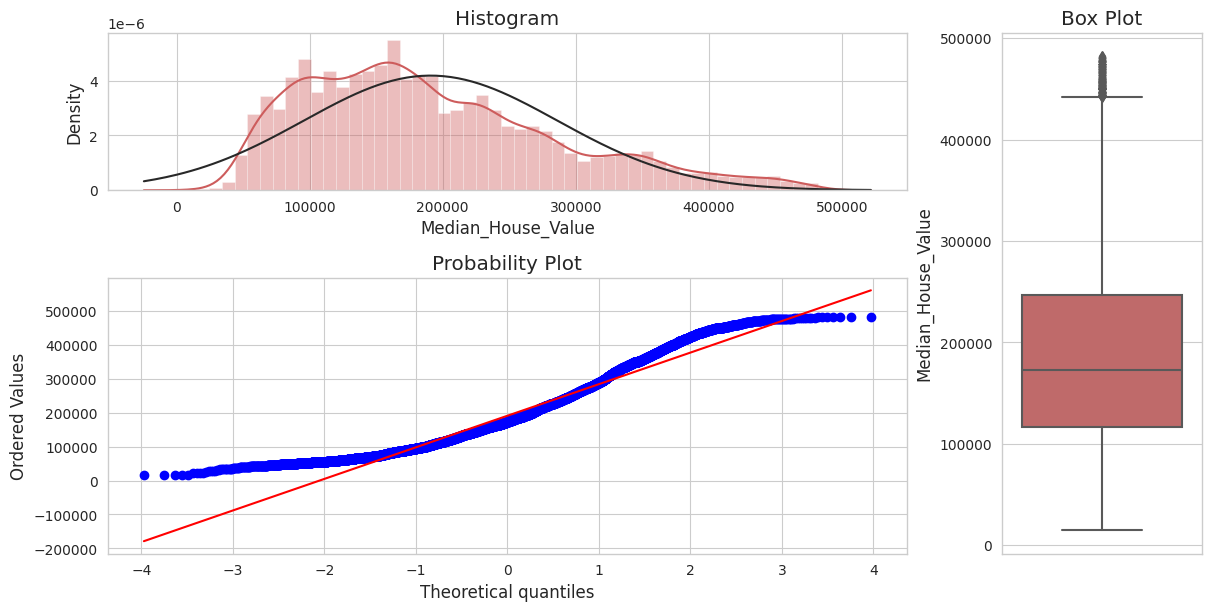

In [ ]:
visualize_target(y)

In [ ]:
Regression_process(X, y)

R2 (train set, test set) 0.6014 0.6038


In [ ]:
y = np.log1p(y)

<ipython-input-106-8f15ccf60ef3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, norm_hist=True,fit=norm, ax = ax1,color='indianred')


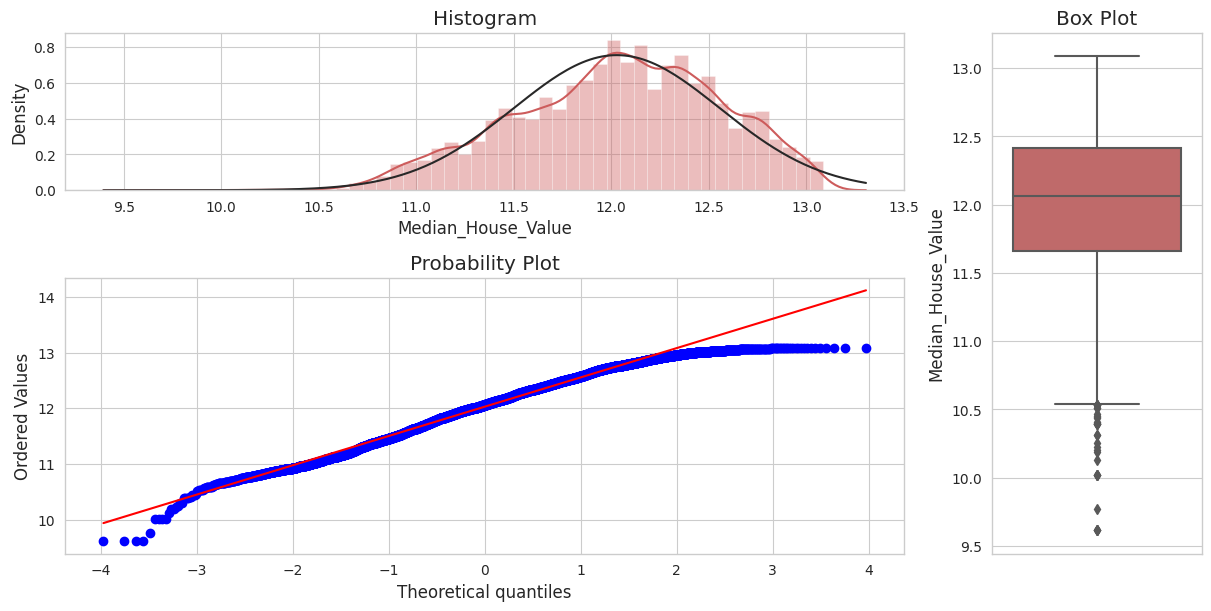

In [ ]:
visualize_target(y)

In [ ]:
Regression_process(X, y)

R2 (train set, test set) 0.654 0.6593


<ipython-input-131-159401b9f256>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X[column], color='indianred')
<ipython-input-131-159401b9f256>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X[column], color='indianred')
<ipython-input-131-159401b9f256>:4: UserWarning: 

`distplot` is a d

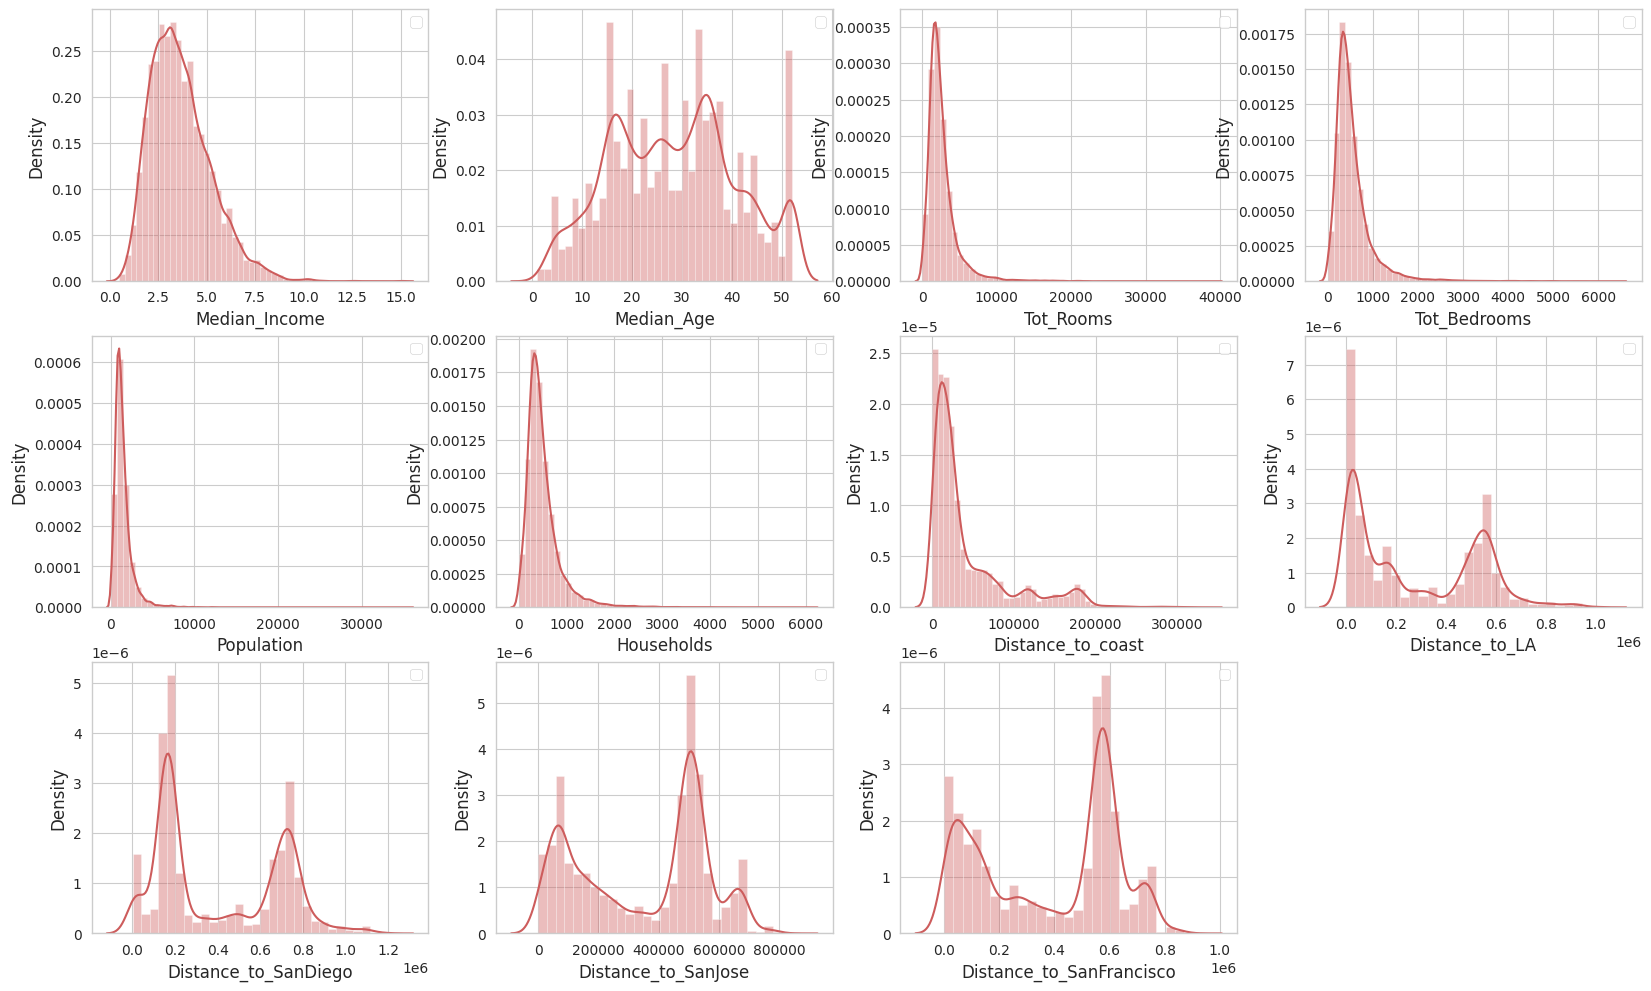

In [ ]:
plt.figure(figsize=(20,12))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.distplot(x=X[column], color='indianred')
    plt.legend()
    plt.xlabel(column)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
df_x = pd.DataFrame(X, columns=['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms',
       'Population', 'Households', 'Distance_to_coast', 'Distance_to_LA',
       'Distance_to_SanDiego', 'Distance_to_SanJose',
       'Distance_to_SanFrancisco'])

In [ ]:
df_x

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,2.990995,1.011986,-0.796925,-0.972498,-0.978870,-0.979155,-0.657545,1.146871,1.154521,-1.302610,-1.467028
1,2.975718,-0.588340,2.051432,1.339829,0.836879,1.660479,-0.638257,1.137802,1.146726,-1.313604,-1.468510
2,2.305580,1.892166,-0.528074,-0.828126,-0.826903,-0.846130,-0.677660,1.139136,1.147720,-1.314447,-1.476806
3,1.269368,1.892166,-0.616470,-0.721622,-0.772754,-0.736580,-0.687498,1.141489,1.149680,-1.312510,-1.479935
4,0.115947,1.892166,-0.454792,-0.615117,-0.766640,-0.632247,-0.687498,1.141489,1.149680,-1.312510,-1.479935
...,...,...,...,...,...,...,...,...,...,...,...
19564,-1.351361,-0.268275,-0.437388,-0.392642,-0.522095,-0.447055,2.403311,1.541997,1.481927,-0.467068,-0.659664
19565,-0.711713,-0.828389,-0.880741,-0.922796,-0.949175,-1.010455,2.371533,1.563031,1.501250,-0.474728,-0.676926
19566,-1.261688,-0.908405,-0.167621,-0.129931,-0.380608,-0.178397,2.237471,1.540030,1.482161,-0.505541,-0.701850
19567,-1.154363,-0.828389,-0.348076,-0.309805,-0.612926,-0.397497,2.202421,1.554769,1.495835,-0.514669,-0.718588


0 Median_Income 0 0
1 Median_Age 0 1
2 Tot_Rooms 0 2
3 Tot_Bedrooms 0 3
4 Population 0 4
5 Households 0 5
6 Distance_to_coast 1 0
7 Distance_to_LA 1 1
8 Distance_to_SanDiego 1 2
9 Distance_to_SanJose 1 3
10 Distance_to_SanFrancisco 1 4


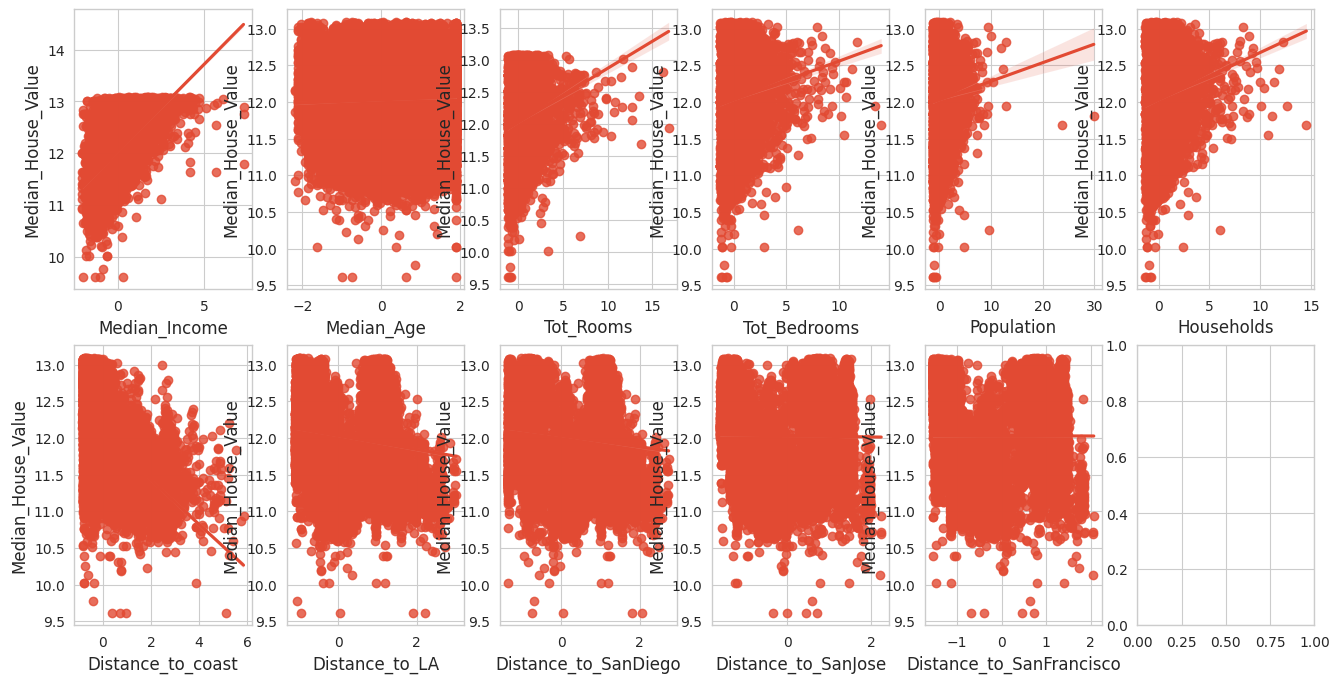

In [ ]:
fig, axes = plt.subplots(figsize=(16, 8), ncols=6, nrows=2)
for i, feature in enumerate(df_x.columns):
    row = int(i/6)
    col = i % 6
    print(i, feature, row, col)
    sns.regplot(x=feature, y=y, data=df_x, ax=axes[row][col])

In [ ]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2_score(y_test, y_pred)

0.6593463205099942

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

0.311247259062962

In [ ]:
mean_squared_error(y_test, y_pred)**0.5

0.311247259062962

In [ ]:
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

In [ ]:
y_pred

array([242417.55104396, 132329.95765911, 119385.50982426, ...,
       218259.72583452, 147412.01072971, 139417.89585896])

In [ ]:
y_test

3674     186800.0
4637     187500.0
14164    161800.0
9221      58800.0
10284    272800.0
           ...   
770      200600.0
5467     412500.0
9946     195100.0
17531    190600.0
16266     62800.0
Name: Median_House_Value, Length: 3914, dtype: float64

In [ ]:
mean_squared_error(y_test, y_pred)**0.5

62434.902513258785

In [ ]:
r2_score(y_test, y_pred)

0.5789838178623947

(0.0, 500000.0)

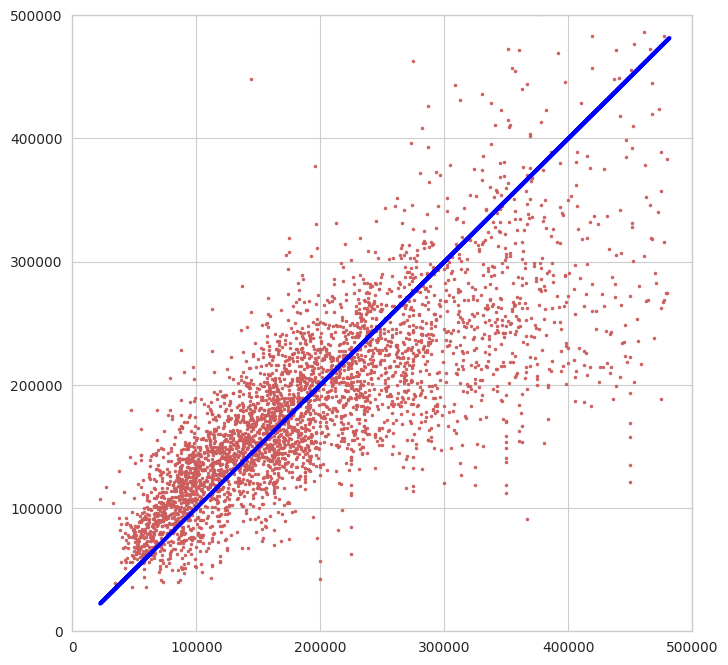

In [ ]:
plt.subplots(figsize=(8,8))
plt.scatter(y_test, y_pred, s=4, color='indianred')
plt.plot(y_test, y_test, color='blue', linewidth=3)
plt.xlim(0, 500000)
plt.ylim(0, 500000)

In [ ]:
df = pd.read_csv('./drive/MyDrive/data/California_Houses.csv')

1. LinearRegression(), cross_val_score : avg_rmse

2. Ridge, alpha=10, cross_val_score : avg_rmse